In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

In [2]:
data = pd.read_csv("hr_dashboard_data.csv")

features = ['Projects Completed', 'Productivity (%)']
X = data[features]

In [3]:
X.head()

,Projects Completed,Productivity (%)
0,11,57
1,19,55
2,8,87
3,1,53
4,14,3


In [4]:
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Projects Completed  200 non-null    int64
 1   Productivity (%)    200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


,Projects Completed,Productivity (%)
count,200.000000,200.000000
mean,11.455000,46.755000
std,6.408849,28.530068
min,0.000000,0.000000
25%,6.000000,23.000000
50%,11.000000,45.000000
75%,17.000000,70.000000
max,25.000000,98.000000


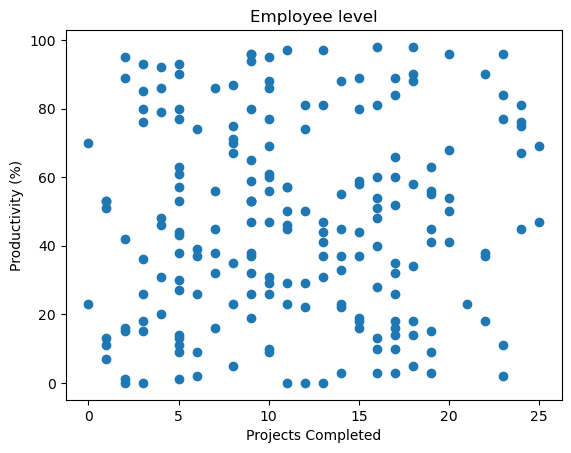

In [5]:
plt.scatter(data['Projects Completed'], data['Productivity (%)'])
plt.xlabel('Projects Completed')
plt.ylabel('Productivity (%)')
plt.title('Employee level')
plt.show()

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

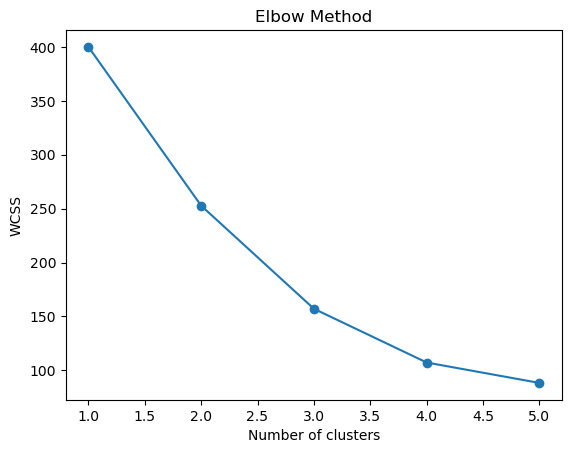

In [7]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [8]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
data['Employee_Level_Cluster'] = kmeans.fit_predict(X_scaled)

In [9]:
cluster_scores = data.groupby('Employee_Level_Cluster')[features].mean()
cluster_scores['Score'] = cluster_scores.mean(axis=1)

sorted_clusters = cluster_scores['Score'].sort_values().index.tolist()

cluster_mapping = {
    sorted_clusters[0]: "Junior",
    sorted_clusters[1]: "Mid",
    sorted_clusters[2]: "Senior"
}

In [13]:
cluster_summary = data.groupby('Employee_Level_Cluster')[features].mean()
print("\nCluster Summary:\n", cluster_summary)



Cluster Summary:
                         Projects Completed  Productivity (%)
Employee_Level_Cluster                                      
0                                 6.184615         25.538462
1                                 9.213115         78.163934
2                                17.932432         39.500000


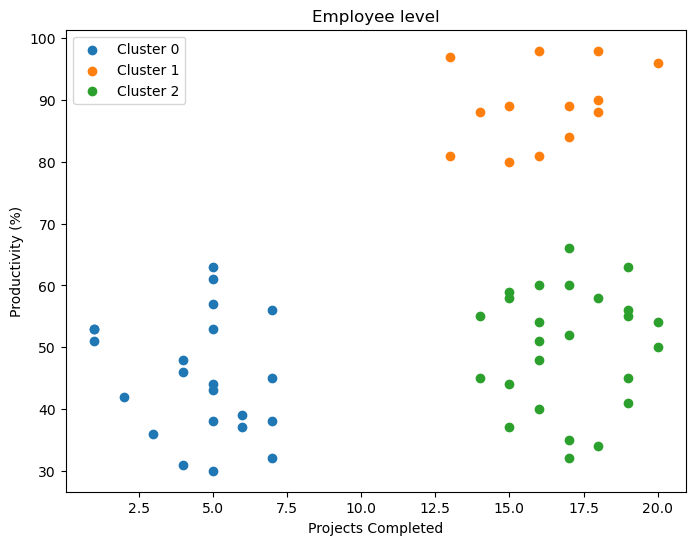

In [41]:
plt.figure(figsize=(8,6))
for cluster in range(3):   
    plt.scatter(
        data[data['Cluster'] == cluster]['Projects Completed'],    
        data[data['Cluster'] == cluster]['Productivity (%)'],  
        label=f'Cluster {cluster}'
    )

plt.xlabel('Projects Completed')
plt.ylabel('Productivity (%)')
plt.title('Employee level')
plt.legend()
plt.show()

In [10]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
data['Employee_Level_Cluster'] = kmeans.fit_predict(X_scaled)

In [11]:
cluster_scores = data.groupby('Employee_Level_Cluster')[features].mean()
cluster_scores['Score'] = cluster_scores.mean(axis=1)

sorted_clusters = cluster_scores['Score'].sort_values().index.tolist()

cluster_mapping = {
    sorted_clusters[0]: "Junior",
    sorted_clusters[1]: "Mid",
    sorted_clusters[2]: "Senior"
}

print("Cluster → Level Mapping:")
print(cluster_mapping)

data['Level'] = data['Employee_Level_Cluster'].map(cluster_mapping)

Cluster → Level Mapping:
{0: 'Junior', 2: 'Mid', 1: 'Senior'}


In [12]:
cluster_summary = data.groupby('Employee_Level_Cluster')[features].mean()
print("\nCluster Summary:\n", cluster_summary)


Cluster Summary:
                         Projects Completed  Productivity (%)
Employee_Level_Cluster                                      
0                                 6.184615         25.538462
1                                 9.213115         78.163934
2                                17.932432         39.500000


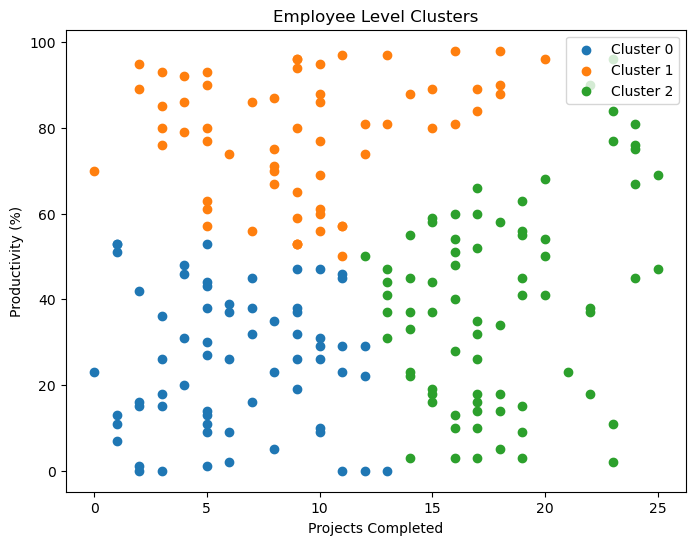

In [13]:
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(
        data[data['Employee_Level_Cluster'] == cluster]['Projects Completed'],
        data[data['Employee_Level_Cluster'] == cluster]['Productivity (%)'],
        label=f'Cluster {cluster}'
    )

plt.xlabel('Projects Completed')
plt.ylabel('Productivity (%)')
plt.title('Employee Level Clusters')
plt.legend()
plt.show()

In [14]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(cluster_mapping, "cluster_mapping.pkl")

['cluster_mapping.pkl']